In [50]:
# Install al necessary dependencies

import sys
!{sys.executable} -m pip install pandas;
!{sys.executable} -m pip install geopandas;
!{sys.executable} -m pip install descartes;
!{sys.executable} -m pip install matplotlib;

In [51]:
# Import all necessary modules

%matplotlib notebook
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons

#shapefile (This file contains geospatial information about Ireland and its counties)
#datafile (Contains average rent data for different locations in Ireland)

shapefile = 'data/NewSHP/Counties__OSi_National_Statutory_Boundaries.shp'
datafile = 'data/Rent_year.csv'


# Use geopandas to read the shapefile into a geodataframe
gdf = gpd.read_file(shapefile)[['COUNTY', 'geometry']]



In [52]:


# Clean datafile and load it into dataframe
cols = range(2,14)
names = ['Location'] + list(str(y) for y in range(2008,2019))

df = pd.read_csv(datafile, usecols = cols, header = None, names = names)

df["Location"] = df["Location"].map(lambda x: x.upper())



<IPython.core.display.Javascript object>


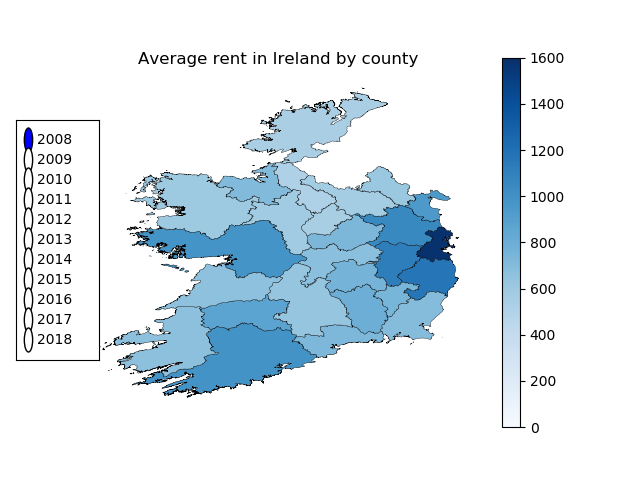

0

In [53]:


#Perform left merge to preserve every row in gdf
#This way we have rent averages for counties
merged = gdf.merge(df, left_on = 'COUNTY', right_on = 'Location', how = 'left')


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

#Plot choropleth map with geopandas
#It's very important to give fixed limits to the colormap
#Get rid of axis and add title

merged.plot(ax = ax, column = '2018', cmap = "Blues",
            vmin = 0, vmax = 1600, legend = True, edgecolor = "black",
           linewidth = 0.25);

plt.axis("off");
plt.title("Average rent in Ireland by county");



#Make the map interactive by adding radio_buttons
#When a radio_button gets pressed, plot the data for that year

def update(label):
    ax.cla()
    merged.plot(ax = ax, column = label, cmap = "Blues",
                vmin = 0, vmax  = 1600, edgecolor = "black",
               linewidth = 0.25);
    ax.axis("off");
    ax.set_title("Average rent in Ireland by county");
    

#Create radio_buttons and connect them to update
years = tuple(str(y) for y in range(2008,2019))
rax = plt.axes([0.025, 0.25, 0.13, 0.5])
radio = RadioButtons(rax, years, active=0)
radio.on_clicked(update)
 